# PART 1: STATISTICAL FORECAST

## 1.1. Data preparation

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create demand array
demand =  np.array([28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12])

## 1.2. Forecasting KPIs

In [ ]:
def KPI(df):
    print("Forecast KPIs are as below:")

    # Average error and average demand
    avg_error = df["Error"].mean()
    avg_demand = df["Demand"].mean()

    # Bias
    bias = avg_error
    print("Bias value is {:.2f}".format(bias))
    print("Bias% value is {:.2%}".format(bias/avg_demand))

    # MAD - Mean Absolute Deviation
    MAD = (df["Demand"]-avg_demand).abs().mean()
    print("MAD value is {:.2f}".format(MAD))
    print("MAD% value is {:.2%}".format(MAD/avg_demand))

    # MAE - Mean Absolute Error
    MAE = df["Error"].abs().mean()
    print("MAE value is {:.2f}".format(MAE))
    print("MAE% value is {:.2%}".format(MAE/avg_demand))

    # MAPE - Mean Absolute Percentage Error
    MAPE = (df["Error"]/df["Demand"]).abs().mean()
    print("MAPE value is {:.2%}".format(MAPE))

    # MSE - Mean Square Error
    MSE = (df["Error"]**2).mean()
    print("MSE value is {:.2f}".format(MSE))

    # RMSE - Root Mean Square Error
    RMSE = MSE**(1/2)
    print("RMSE value is {:.2f}".format(RMSE))
    print("RMSE% value is {:.2%}".format(RMSE/avg_demand))

## 1.3. Moving Average

In [ ]:
def moving_average(demand, fcst_period = 1, avg_period = 3):

    # Create the forecast array
    forecast = np.full(len(demand), np.NaN)

    # Update the demand array
    demand = np.append(demand, fcst_period*np.NaN)

    # Update the forecast array
    forecast = np.append(forecast, fcst_period*np.NaN)

    # Forecast
    for i in range(avg_period, len(demand)):
        forecast[i] = np.mean(demand[i-avg_period:i])

    # Return the result dataframe
    df = pd.DataFrame({'Demand':demand, 'Forecast':forecast, 'Error':demand - forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = moving_average(demand, fcst_period = 1, avg_period = 3)
KPI(df)

Forecast KPIs are as below:
Bias value is -0.94
Bias% value is -6.08%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.06
MAE% value is 13.24%
MAPE value is 15.35%
MSE value is 8.86
RMSE value is 2.98
RMSE% value is 19.17%


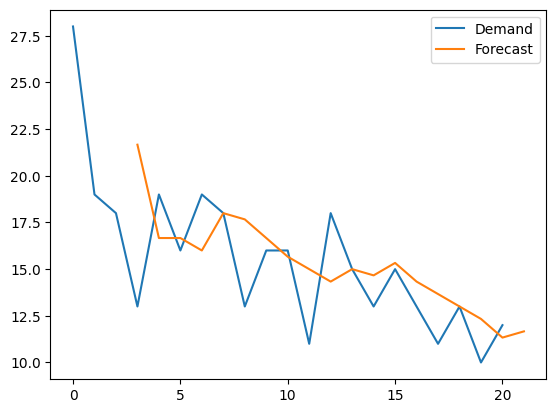

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.4. Simple Exponential Smoothing

In [ ]:
def simple_exponential_smoothing(demand, fcst_period = 1, alpha = 0.4):

    # Create forecast array
    forecast = np.full(len(demand), np.NaN)

    # Update demand and forecast array
    demand = np.append(demand, fcst_period*np.NaN)
    forecast = np.append(forecast, fcst_period*np.NaN)

    # Initiate the first forecast
    forecast[0] = demand[0]

    # Forecast the rest
    for i in range (1, len(forecast)):
        forecast[i] = alpha*demand[i-1]+(1-alpha)*forecast[i-1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand':demand, 'Forecast':forecast, 'Error':demand - forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = simple_exponential_smoothing(demand, fcst_period = 1, alpha = 0.4)
KPI(df)

Forecast KPIs are as below:
Bias value is -1.92
Bias% value is -12.40%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.61
MAE% value is 16.81%
MAPE value is 18.33%
MSE value is 14.41
RMSE value is 3.80
RMSE% value is 24.45%


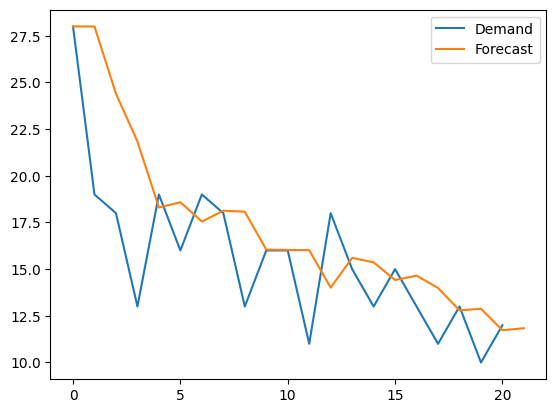

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.5. Double Exponential Smoothing

In [ ]:
def double_exponential_smoothing(demand, fcst_period = 1, alpha = 0.4, beta = 0.4):

    # Create forecast, level and trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    # Update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    # Intiate the first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    # Forecast the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = double_exponential_smoothing(demand, fcst_period = 1, alpha = 0.4, beta = 0.4)
KPI(df)

Forecast KPIs are as below:
Bias value is 2.51
Bias% value is 16.19%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 4.17
MAE% value is 26.88%
MAPE value is 26.80%
MSE value is 37.33
RMSE value is 6.11
RMSE% value is 39.36%


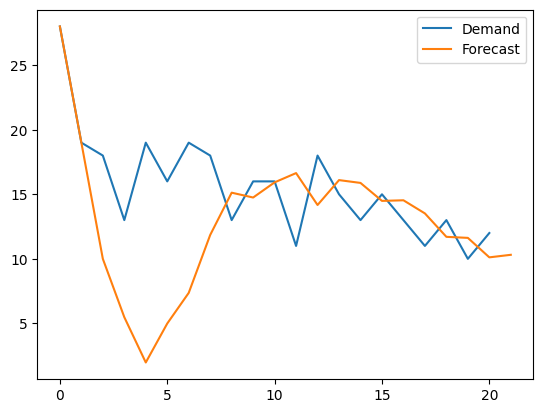

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.6.  Model Optimization (Simple and Double Exponential Smoothing example)

In [ ]:
def exponential_smoothing_optimization(demand, fcst_period = 6):
  params = [] # alphas and betas
  KPIs = [] # result of KPIs
  dfs = [] # result dataframes

  # Loop alpha option
  for alpha in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    df = simple_exponential_smoothing(demand, fcst_period, alpha)
    params.append(f'Simple Smoothing, alpha: {alpha}')
    dfs.append(df)
    MAE = df['Error'].abs().mean()
    KPIs.append(MAE)

    # Loop beta options
    for beta in [0.05, 0.1, 0.2, 0.3, 0.4]:
      df = double_exponential_smoothing(demand, fcst_period, alpha, beta)
      params.append(f'Double Smoothing, alpha: {alpha}, beta: {beta}')
      dfs.append(df)
      MAE = df['Error'].abs().mean()
      KPIs.append(MAE)

  # Choosing the dataframe with best KPI
  mini = np.argmin(KPIs)
  print(f'Best solution found for {params[mini]} MAE of', round(KPIs[mini], 2))
  print(KPIs)

  return dfs[mini]

In [ ]:
# Result
df = exponential_smoothing_optimization(demand)

Best solution found for Simple Smoothing, alpha: 0.4 MAE of 2.61
[8.368663579891686, 54.364633521790005, 50.39677315982466, 43.16968719109362, 36.81189694070955, 31.238993500417077, 5.9754740786999365, 39.81832747831705, 34.476528643639945, 25.622385545849152, 18.9601446127948, 16.13306415542628, 3.756661785044236, 24.158829141793596, 18.90870147130008, 11.960194462564385, 9.684175102674098, 8.549507142477461, 2.874592978920482, 16.724211021133613, 12.383662430596596, 7.633579549860413, 6.1949356750707825, 5.405890888939897, 2.609861658102383, 12.66362755456908, 9.1222823951511, 5.680288852213918, 4.7007821197684265, 4.172167318564403, 2.6561521802629744, 10.167809810776223, 7.221664626652124, 4.745887228963493, 4.0685890550257335, 3.7050967925124265, 2.7263277380790627, 8.492114509870012, 5.984085328716431, 4.155044494489834, 3.752311752126024, 3.4524292807792962]


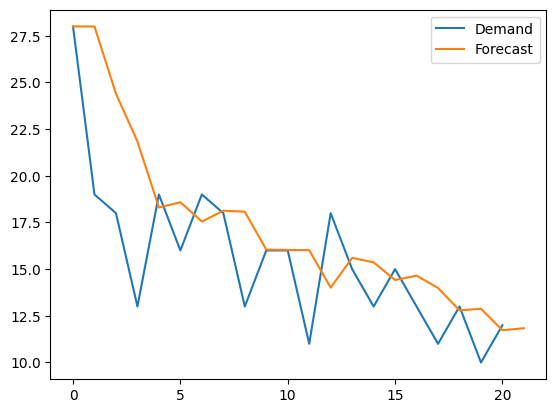

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.7. Double Exponential Smoothing With Damped Trend

In [ ]:
def double_exponential_smoothing_with_damped_trend(demand, fcst_period = 1, alpha = 0.4, beta = 0.4, phi = 0.9):

    # Create forecast, level and trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    # Update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    # Intiate the first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    # Forecast the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+phi*trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*phi*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = double_exponential_smoothing_with_damped_trend(demand, fcst_period = 1, alpha = 0.4, beta = 0.4)
KPI(df)

Forecast KPIs are as below:
Bias value is 1.72
Bias% value is 11.10%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 3.40
MAE% value is 21.88%
MAPE value is 22.19%
MSE value is 22.95
RMSE value is 4.79
RMSE% value is 30.86%


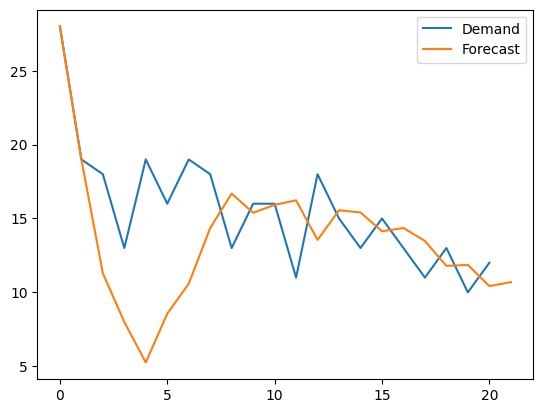

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.8. Triple Exponential Smoothing (Multiplicative) With Damped Trend

In [ ]:
def triple_exponential_smoothing_with_damped_trend(demand, season_length = 12, fcst_period = 1, alpha = 0.4, beta = 0.4, phi = 0.9, gamma = 0.3):

    # Create forecast, level, trend and season array
    forecast = np.full(len(demand), np.NaN)
    level = np.full(len(demand), np.NaN)
    trend = np.full(len(demand), np.NaN)
    season = np.full(len(demand), np.NaN)

    # Calculate average monthly demand
    average_monthly_demand = (demand[:].sum())/(demand.shape[0])

    # Create average each month demand array
    average_each_month_demand = np.full(season_length, np.NaN)

    # Calculate seasonal index for first cycle
    for i in range(0, season_length):
        average_each_month_demand[i] = demand[i:len(demand):season_length].mean()
        season[i] = average_each_month_demand[i]/average_monthly_demand

    # Update demand, forecast, level, trend and season array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)
    season = np.append(season,fcst_period*np.NaN)

    # Forecast initiate
    forecast[0]=demand[0]
    level[0]=demand[0]/season[0]
    trend[0]=demand[1]/season[1]-demand[0]/season[0]

    # Forecast for the first cycle
    for i in range (1, season_length):
        forecast[i] = (level[i-1]+phi*trend[i-1])*season[i]
        level[i] = alpha*demand[i]/season[i]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i] = beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]

    # Forecast the rest
    for i in range (season_length,len(demand)):
        forecast[i]=(level[i-1]+phi*trend[i-1])*season[i-season_length]
        level[i]=alpha*demand[i]/season[i-season_length]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
        season[i]=gamma*demand[i]/level[i]+(1-gamma)*season[i-season_length]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({"Demand":demand,"Forecast":forecast,"Error":demand-forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = triple_exponential_smoothing_with_damped_trend(demand, season_length = 12, fcst_period = 1, alpha = 0.4, beta = 0.4, phi = 0.9, gamma = 0.3)
KPI(df)

Forecast KPIs are as below:
Bias value is 0.14
Bias% value is 0.88%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 1.73
MAE% value is 11.14%
MAPE value is 11.38%
MSE value is 4.75
RMSE value is 2.18
RMSE% value is 14.04%


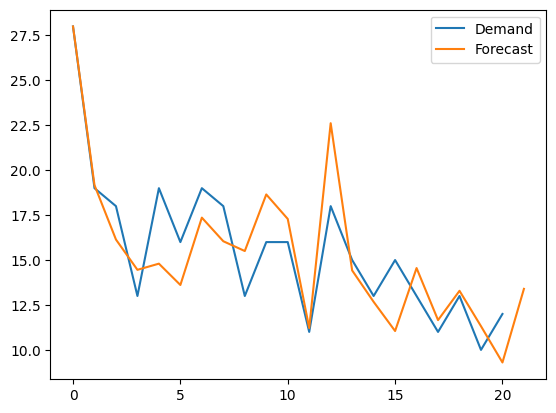

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])

## 1.9. Triple Exponential Smoothing (Additive) With Damped Trend

In [ ]:
def triple_exponential_smoothing_with_damped_trend_additive(demand, season_length = 12, fcst_period = 1, alpha = 0.4, beta = 0.4, phi = 0.9, gamma = 0.3):

    # Create forecast, level, trend and season array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)
    season = np.full(len(demand),np.NaN)

    # Calculate average monthly demand
    average_monthly_demand = (demand[:].sum())/(demand.shape[0])

    # Create average each month demand array
    average_each_month_demand = np.full(season_length,np.NaN)

    # Calculate seasonal index for first cycle
    for i in range(0,season_length):
        average_each_month_demand[i]=demand[i:len(demand):season_length].mean()
        season[i]=average_each_month_demand[i]-average_monthly_demand

    # Update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)
    season = np.append(season,fcst_period*np.NaN)

    # Forecast initiate
    forecast[0]=demand[0]
    level[0]=demand[0]-season[0]
    trend[0]=(demand[1]-season[1])-(demand[0]-season[0])

    # Forecast for the first cycle
    for i in range (1,season_length):
        forecast[i]=level[i-1]+phi*trend[i-1]+season[i]
        level[i]=alpha*(demand[i]-season[i])+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]

    # Forecast the rest cycle
    for i in range (season_length,len(demand)):
        forecast[i]=level[i-1]+phi*trend[i-1]+season[i-season_length]
        level[i]=alpha*(demand[i]-season[i-season_length])+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
        season[i]=gamma*(demand[i]-level[i])+(1-gamma)*season[i-season_length]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({"Demand":demand,"Forecast":forecast,"Error":demand-forecast})
    return df

In [ ]:
# KPIs of the forecasting technique
df = triple_exponential_smoothing_with_damped_trend_additive(demand, season_length = 12, fcst_period = 1, alpha = 0.4, beta = 0.4, phi = 0.9, gamma = 0.3)
KPI(df)

Forecast KPIs are as below:
Bias value is 0.55
Bias% value is 3.54%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.00
MAE% value is 12.88%
MAPE value is 12.87%
MSE value is 6.66
RMSE value is 2.58
RMSE% value is 16.62%


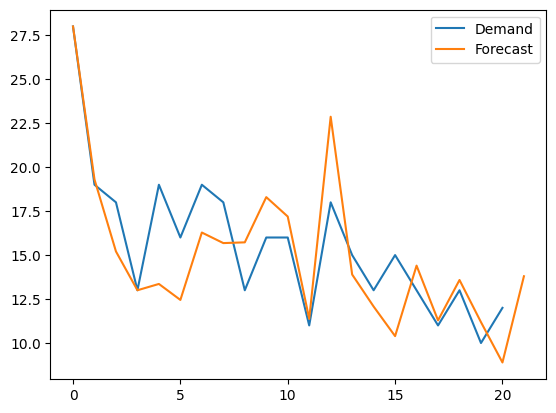

In [ ]:
# Visualize the result
df.index.name = 'Period'
plt.plot(df['Demand'])
plt.plot(df['Forecast'])
plt.legend(['Demand', 'Forecast'])